In [71]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import numpy as np 

In [72]:
# Importing the images 
CHANNELS = 3 
WIDTH = 224 
HEIGHT = 224 

img = cv2.imread('/content/person_with_spec.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (WIDTH, HEIGHT))

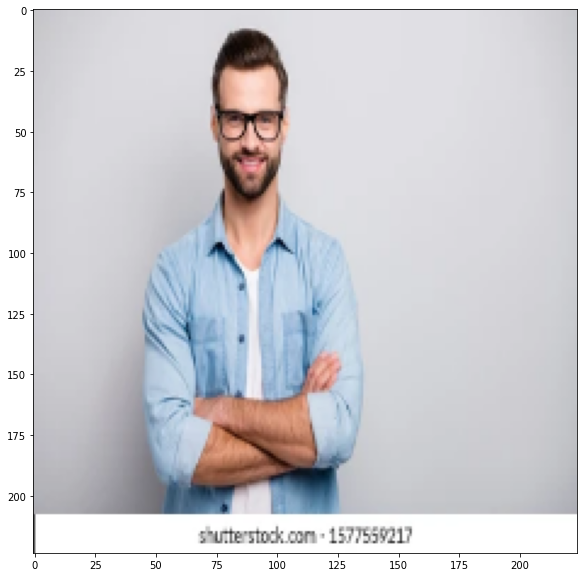

In [73]:
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [74]:
img.shape

(224, 224, 3)

In [84]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


np.random.seed(42)

SIZE=256
img_data=[]

img=cv2.imread('images/monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()



model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)


print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


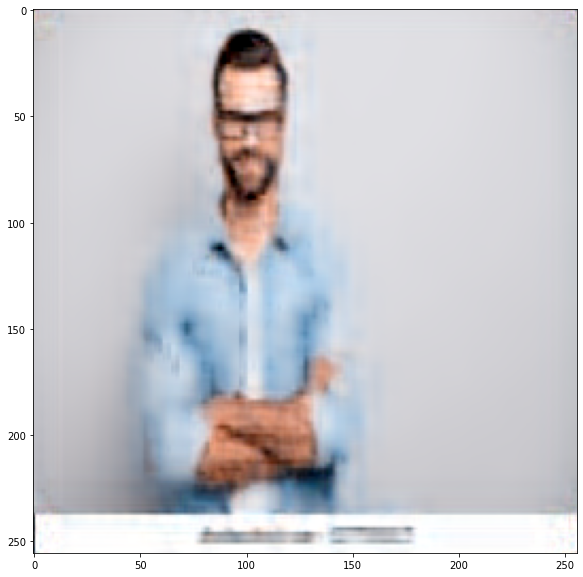

In [84]:
plt.figure(figsize = (10, 10))

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")